In [2]:
import pandas as pd
import numpy as np

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [3]:
X = pd.read_csv("/Users/nipunbatra/Downloads/Stats_Features.csv", 
                names=["Max", "Min", "Mean", "StdDev", "Median",
                       "Mode", "Variance", "Percentile10","Percentile25",
                       "Percentile75","Percentile90", "Range"])

In [4]:
X.head()

,Max,Min,Mean,StdDev,Median,Mode,Variance,Percentile10,Percentile25,Percentile75,Percentile90,Range
0,0.003144,0.001048,0.002112,0.000251,0.002096,0.002096,6.284900e-08,0.001834,0.001965,0.002227,0.002489,0.002096
1,0.003144,0.001048,0.002100,0.000242,0.002096,0.002096,5.856700e-08,0.001834,0.001965,0.002227,0.002358,0.002096
2,0.003275,0.000917,0.002105,0.000241,0.002096,0.002096,5.829200e-08,0.001834,0.001965,0.002227,0.002358,0.002358
3,0.003144,0.001179,0.002040,0.000245,0.002096,0.002096,6.009000e-08,0.001703,0.001834,0.002227,0.002358,0.001965
4,0.003275,0.001179,0.002083,0.000252,0.002096,0.002096,6.346600e-08,0.001703,0.001965,0.002227,0.002358,0.002096


In [5]:
Y = np.array([7500*[x] for x in ["BGN", "LC", "LCD", "CFL", "CPU", "PRT"]])

In [6]:
Y = Y.flatten()

In [7]:
Y.shape

(45000,)

In [8]:
X.shape

(45000, 12)

In [90]:
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier


In [91]:
clasifiers = {"RF":RandomForestClassifier(), 
              "KNN": KNeighborsClassifier(),
             "DT":DecisionTreeClassifier()}

In [56]:
X_new

array([[ 0.003144 ,  0.001048 ,  0.0021118, ...,  0.002227 ,  0.002489 ,
         0.002096 ],
       [ 0.003144 ,  0.001048 ,  0.0021001, ...,  0.002227 ,  0.002358 ,
         0.002096 ],
       [ 0.003275 ,  0.000917 ,  0.0021049, ...,  0.002227 ,  0.002358 ,
         0.002358 ],
       ..., 
       [ 0.20148  ,  0.067465 ,  0.055438 , ...,  0.084102 ,  0.10704  ,
         0.26894  ],
       [ 0.12144  ,  0.080172 ,  0.0057317, ...,  0.018209 ,  0.037728 ,
         0.20161  ],
       [ 0.13126  ,  0.083971 ,  0.024188 , ...,  0.044671 ,  0.059212 ,
         0.21523  ]])

In [32]:
rfecv = RFECV(estimator=KNeighborsClassifier(), step=1, cv=StratifiedKFold(Y, 5),
              scoring='accuracy')
rfecv.fit(X, Y)

AttributeError: 'KNeighborsClassifier' object has no attribute 'coef_'

In [11]:
from copy import deepcopy

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
accuracies = {}
for k in range(1, 3):
    print k
    X_new = SelectKBest(chi2, k=k).fit_transform(X.abs(), Y)
    accuracies[k] = {}
    for clf_name, clf in clasifiers.iteritems():
            accuracies[k][clf_name] = np.mean(cross_validation.cross_val_score(clf, X_new, Y, cv=5))
            cross_validation.cross_val_score(clf, X_new, Y, cv=5, score='confusion matrix')


1


TypeError: cross_val_score() got an unexpected keyword argument 'score'

In [67]:
%matplotlib inline

In [74]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

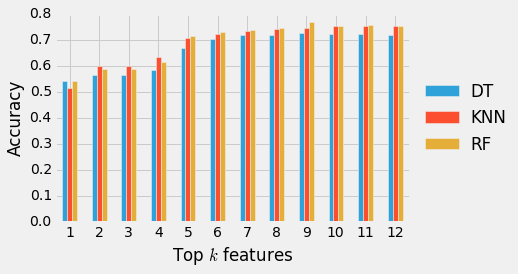

In [93]:

pd.DataFrame(accuracies).T.plot(kind='bar',rot=0).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(r"Top $k$ features")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig("/Users/nipunbatra/Dropbox/Public/notebooks/manoj/accuracy_num_features.pdf", bbox_inches="tight")

In [94]:
pd.DataFrame(accuracies).T

,DT,KNN,RF
1,0.543244,0.516956,0.542311
2,0.565022,0.598733,0.586333
3,0.565956,0.600444,0.587267
4,0.585311,0.635267,0.613511
5,0.670733,0.709178,0.716400
6,0.703689,0.723333,0.729778
7,0.717489,0.734533,0.736867
8,0.719533,0.740622,0.745200
9,0.727200,0.747578,0.768756
10,0.723111,0.753889,0.752378


In [45]:
pd.DataFrame(accuracies).plot(kind='bar')

In [97]:
from sklearn.ensemble import ExtraTreesClassifier


In [98]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

In [99]:
forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(12):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 11 (0.102997)
2. feature 7 (0.097529)
3. feature 3 (0.093628)
4. feature 10 (0.090187)
5. feature 9 (0.090182)
6. feature 0 (0.087920)
7. feature 8 (0.087315)
8. feature 4 (0.085705)
9. feature 2 (0.083104)
10. feature 1 (0.078243)
11. feature 6 (0.061995)
12. feature 5 (0.041196)


In [28]:
%matplotlib qt

In [100]:
importances[indices]

array([ 0.10299703,  0.09752851,  0.09362792,  0.09018693,  0.09018219,
        0.08791989,  0.08731468,  0.08570516,  0.08310397,  0.0782433 ,
        0.06199481,  0.04119562])

In [101]:
ser = pd.Series(importances[indices], index=X.columns[indices])

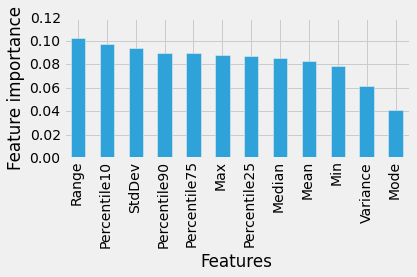

In [102]:
ser.plot(kind="bar")
plt.xlabel("Features")
plt.ylabel("Feature importance")
plt.tight_layout()
plt.savefig("/Users/nipunbatra/Desktop/features.png")


In [136]:
accuracies = {}
features = X.columns[indices][:]
for i in range(1, len(features)):
    subset = features[:i]

    accuracies[i] = {}

    for clf_name, clf in clasifiers.iteritems():
        accuracies[i][clf_name] = np.mean(cross_validation.cross_val_score(clf, X[subset], Y, cv=5))


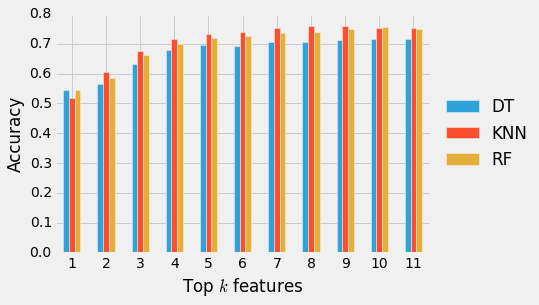

In [139]:
pd.DataFrame(accuracies).T.plot(kind='bar',rot=0).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Top $k$ features")
plt.ylabel("Accuracy")

In [109]:
accuracies

{'DT': 0.54324444444444442,
 'KNN': 0.5169555555555555,
 'RF': 0.54155555555555557,
 (): {'DT': 0.63344444444444448,
  'KNN': 0.67442222222222215,
  'RF': 0.65455555555555556},
 ('Range',): {'DT': 0.63091111111111109,
  'KNN': 0.67442222222222215,
  'RF': 0.66268888888888888},
 ('Range', 'Percentile10'): {'DT': 0.63371111111111111,
  'KNN': 0.67442222222222215,
  'RF': 0.66168888888888888}}